<a href="https://colab.research.google.com/github/clouw2003/Jaynes-Cummings-model/blob/main/Pair_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Quantum object: dims=[[5, 2], [5, 2]], shape=(10, 10), type='oper', dtype=Dia, isherm=False
Qobj data =
[[0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.41421356 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.41421356
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.73205081 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.73205081 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         2.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         2.        ]
 [0.         0.         0.      

Text(0.5, 1.0, 'Vacuum Rabi oscillations')

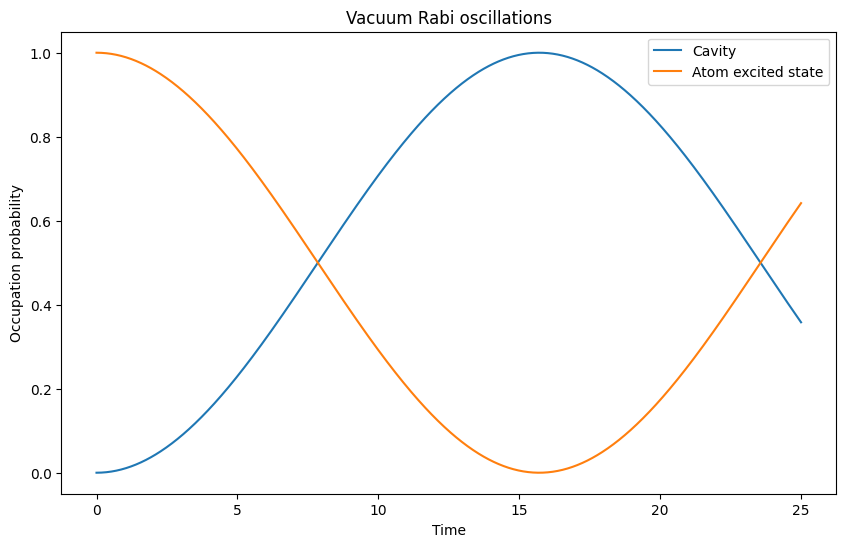

In [ ]:
# setup the matplotlib graphics library and configure it to show
# figures inline in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
!pip install qutip

# make qutip available in the rest of the notebook
from qutip import *
pi = np.pi


wc = 1.0  * 2 * pi  # cavity frequency
wa = 1.0  * 2 * pi  # atom frequency
g  = 0.05 * 2 * pi  # coupling strength
kappa = 0.1     # cavity dissipation rate
gamma = 0.0        # atom dissipation rate (how many photons we are losing, we can just set to 0)
N = 15              # number of cavity fock states
n_th_a = 1        # avg number of thermal bath excitation
use_rwa = True      # Decides if we use the rotating wave approximation

tlist = np.linspace(0,25,1000)

# intial state
psi0 = tensor(basis(N,0), basis(2,1))    # start with an excited atom

# operators
a  = tensor(destroy(N), qeye(2)) #qeye makes an identity matrix with dimension (NxN)
sm = tensor(qeye(N), destroy(2))
print(a)

# Hamiltonian
if use_rwa:
    H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())
else:
    H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() + a) * (sm + sm.dag())

c_ops = []

# cavity relaxation
rate = kappa * (1 + n_th_a)
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * a)

# cavity excitation, if temperature > 0
rate = kappa * n_th_a
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * a.dag())

# qubit relaxation
rate = gamma
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * sm)

output = mesolve(H, psi0, tlist, c_ops, [a.dag() * a, sm.dag() * sm])


n_c = output.expect[0]
n_a = output.expect[1]

fig, axes = plt.subplots(1, 1, figsize=(10,6))

axes.plot(tlist, n_c, label="Cavity")
axes.plot(tlist, n_a, label="Atom excited state")
axes.legend(loc=0)
axes.set_xlabel('Time')
axes.set_ylabel('Occupation probability')
axes.set_title('Vacuum Rabi oscillations')

0.0
6.4125
6.41275
12.82525
12.8255
19.238
19.23825


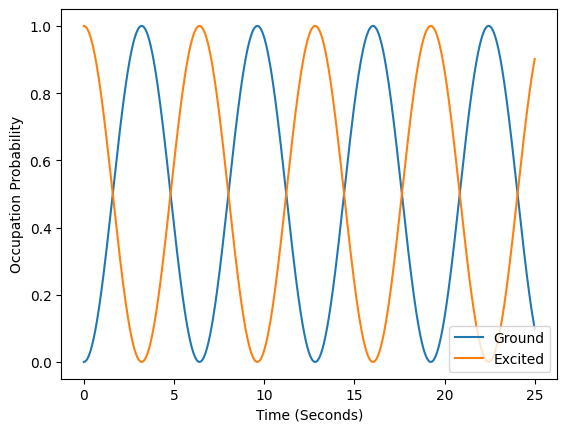

<Figure size 640x480 with 0 Axes>

In [ ]:
n = 5
lambd = 0.2
steps = 100000
tmax = 25
tlist = np.linspace(0, tmax, steps)
psi0 = basis(2,1)
psival = []
for i in range(len(tlist)):
  uBasic = qutip.Qobj([[np.cos(lambd*(np.sqrt(n+1)*tlist[i])), -1j*np.sin(lambd*(np.sqrt(n+1)*tlist[i]))],
                      [-1j*np.sin(lambd*(np.sqrt(n+1)*tlist[i])), np.cos(lambd*(np.sqrt(n+1)*tlist[i]))]])
  psinext = uBasic*psi0
  if abs(basis(2,1).dag()*psinext)**2 >0.99999999:
    print(i*tmax/steps)
  psival.append(psinext)
psival = np.array(psival)
prob0 = []
prob1 = []
for i in psival:
  probGround = abs(basis(2,0).dag()*i)**2
  prob0.append(probGround)
  probExcited = abs(basis(2,1).dag()*i)**2
  prob1.append(probExcited)
plt.plot(tlist, prob0, label = 'Ground')
plt.plot(tlist, prob1, label = 'Excited')
plt.legend(loc = 4)
plt.xlabel('Time (Seconds)')
plt.ylabel('Occupation Probability')
plt.show()
plt.clf()
# plt.plot(tlist, psival)
# plt.show()

# a  = tensor(destroy(2), qeye(2))
# sigmap = tensor(qeye(2), destroy(2))
# H = lambd*(a*sigmap+a.dag()*sigmap.dag())
# psi0=tensor(basis(2, 0), basis(2,1))
# output = mesolve(H, psi0, tlist, [], [], options=Options(max_step = 0.0001))
# print(output.states[-1], psi0)
# n_g = []
# n_e = []
# for i in range(len(tlist)):
#   middleG = (tensor(basis(2, 0), basis(2,0)).dag())*output.states[i]
#   middleE = (tensor(basis(2, 0), basis(2,1)).dag())*output.states[i]
#   n_g.append(middleG)
#   n_e.append(middleE)
# plt.plot(tlist, n_g)
# plt.plot(tlist, n_e)
# plt.show()
# plt.clf()


0.0
8.976
17.95175


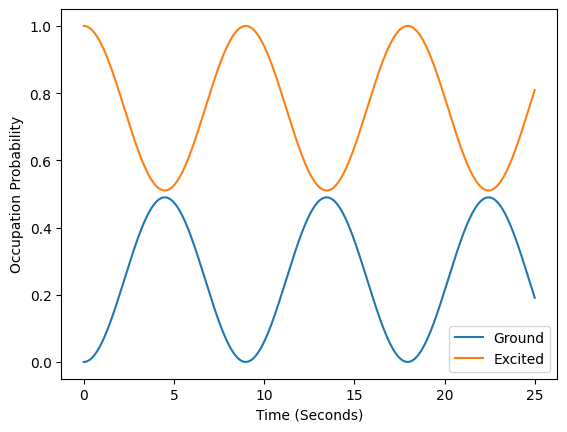

In [ ]:
delta = 0.5
n = 5
lambd = 0.1
tmax = 25
steps = 100000
tlist = np.linspace(0, tmax, steps)
ohm = 0.5*np.sqrt(delta**2+4*(lambd**2)*(n+1))
i = 1
psival = []
psi0 = basis(2, 1)
for i in range(len(tlist)):
  uExtend = qutip.Qobj([[np.cos(ohm*tlist[i])+1j*delta*np.sin(ohm*tlist[i])*(1/(2*ohm)), -1j*lambd*np.sqrt(n+1)*np.sin(ohm*tlist[i])*(1/(ohm))],
                      [-1j*lambd*np.sqrt(n+1)*np.sin(ohm*tlist[i])*(1/(ohm)), np.cos(ohm*tlist[i])+1j*delta*np.sin(ohm*tlist[i])*(1/(2*ohm))]])
  psinext = uExtend*psi0
  if abs(basis(2,1).dag()*psinext)**2 >0.999999999:
    print(i*tmax/steps)
  psival.append(psinext)
psival = np.array(psival)
prob0 = []
prob1 = []
for i in psival:
  probGround = abs(basis(2,0).dag()*i)**2
  prob0.append(probGround)
  probExcited = abs(basis(2,1).dag()*i)**2
  prob1.append(probExcited)
plt.plot(tlist, prob0, label = "Ground")
plt.plot(tlist, prob1, label = 'Excited')
plt.legend(loc = 4)
plt.xlabel('Time (Seconds)')
plt.ylabel('Occupation Probability')
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 14.4 MB/s eta 0:00:00
0.0
6.4125
6.41275
12.82525
12.8255
19.238
19.23825


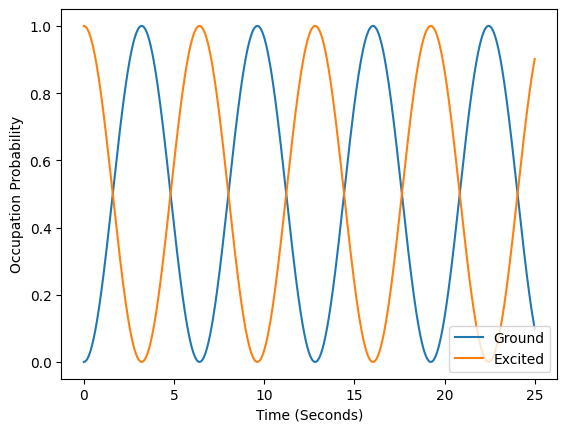

0.0
8.976
17.95175


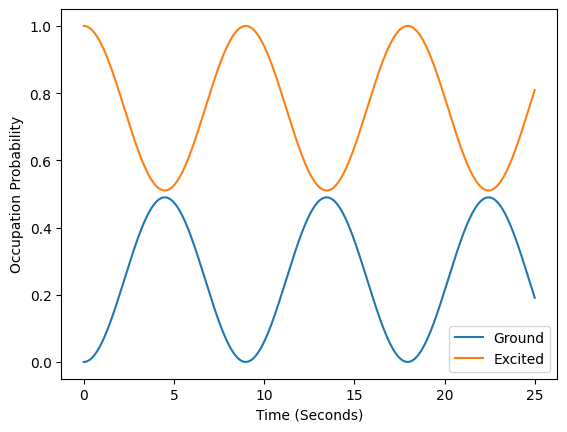

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
!pip install qutip
from qutip import *

##########################
#####   Basic Model  #####
##########################



n = 5
lambd = 0.2
steps = 100000
tmax = 25
tlist = np.linspace(0, tmax, steps)
psi0 = basis(2,1)
psival = []
for i in range(len(tlist)):
  uBasic = qutip.Qobj([[np.cos(lambd*(np.sqrt(n+1)*tlist[i])), -1j*np.sin(lambd*(np.sqrt(n+1)*tlist[i]))],
                      [-1j*np.sin(lambd*(np.sqrt(n+1)*tlist[i])), np.cos(lambd*(np.sqrt(n+1)*tlist[i]))]])
  psinext = uBasic*psi0
  if abs(basis(2,1).dag()*psinext)**2 >0.99999999:
    print(i*tmax/steps)
  psival.append(psinext)
psival = np.array(psival)
prob0 = []
prob1 = []
for i in psival:
  probGround = abs(basis(2,0).dag()*i)**2
  prob0.append(probGround)
  probExcited = abs(basis(2,1).dag()*i)**2
  prob1.append(probExcited)
plt.plot(tlist, prob0, label = 'Ground')
plt.plot(tlist, prob1, label = 'Excited')
plt.legend(loc = 4)
plt.xlabel('Time (Seconds)')
plt.ylabel('Occupation Probability')
plt.show()
plt.clf()

#############################
#####   Extended Model  #####
#############################

delta = 0.5
n = 5
lambd = 0.1
tmax = 25
steps = 100000
tlist = np.linspace(0, tmax, steps)
ohm = 0.5*np.sqrt(delta**2+4*(lambd**2)*(n+1))
i = 1
psival = []
psi0 = basis(2, 1)
for i in range(len(tlist)):
  uExtend = qutip.Qobj([[np.cos(ohm*tlist[i])+1j*delta*np.sin(ohm*tlist[i])*(1/(2*ohm)), -1j*lambd*np.sqrt(n+1)*np.sin(ohm*tlist[i])*(1/(ohm))],
                      [-1j*lambd*np.sqrt(n+1)*np.sin(ohm*tlist[i])*(1/(ohm)), np.cos(ohm*tlist[i])+1j*delta*np.sin(ohm*tlist[i])*(1/(2*ohm))]])
  psinext = uExtend*psi0
  if abs(basis(2,1).dag()*psinext)**2 >0.999999999:
    print(i*tmax/steps)
  psival.append(psinext)
psival = np.array(psival)
prob0 = []
prob1 = []
for i in psival:
  probGround = abs(basis(2,0).dag()*i)**2
  prob0.append(probGround)
  probExcited = abs(basis(2,1).dag()*i)**2
  prob1.append(probExcited)
plt.plot(tlist, prob0, label = "Ground")
plt.plot(tlist, prob1, label = 'Excited')
plt.legend(loc = 4)
plt.xlabel('Time (Seconds)')
plt.ylabel('Occupation Probability')
plt.show()